# Project 2: Randomized Optimization

In [1]:
import mlrose_hiive as mlrose
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "D:\Github\ML\wine.data"
df_wine = pd.read_csv(file_path, delimiter = ',')
df_wine.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols","Flavanoids", "nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# Part 1: Exploratory Data Analysis: find the missing value, statistics etc

In [3]:
#plot the heatmap to see the correlation between different columns
#corrmap = df_wine.corr()
#f, ax = plt.subplots(figsize = (10,10))
#sns.heatmap(corrmap, ax=ax, linewidth = 0.1)

In [4]:
#drop the Ash columns as it is the least reated to the wine class
df_wine.drop('Ash', axis = 1, inplace = True)

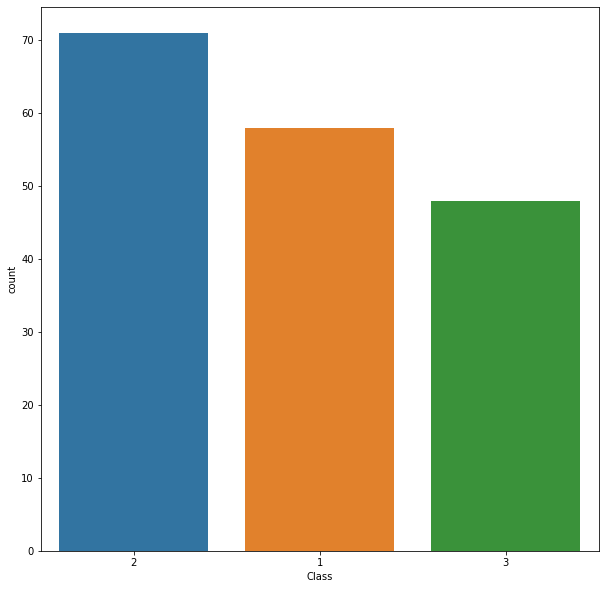

In [5]:
#plot the wine distribution
plt.figure(figsize=(10,10))
sns.countplot(x='Class', data=df_wine, order=df_wine['Class'].value_counts().index);

In [6]:
#create training and testing variables
X = df_wine.drop(['Class'], axis = 1)
y = df_wine['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)

In [7]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

# Part 2: Neural Network modeling

Randomized Hill Climbing algorithm to find the optimal weights

In [24]:
# Initialize neural network object and fit object
rhc_start = time.time()
rhc_nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, restarts = 1, curve = True)

rhc_nn_model1.fit(X_train_scaled, y_train_hot)
print('rhc_loss:', rhc_nn_model1.loss)

rhc_train_time = time.time() - rhc_start
print('rhc_train_time:', rhc_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
rhc_y_train_pred = rhc_nn_model1.predict(X_train_scaled)
rhc_y_train_roc = roc_auc_score(y_train_hot, rhc_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
#print('rhc_y_train_roc', rhc_y_train_roc, 'rhc_y_train_query_time: ', rhc_y_train_query_time)
print('rhc_y_train_roc', rhc_y_train_roc)
#rhc_y_train_accuracy = accuracy_score(y_train_hot, rhc_y_train_pred)

#print(rhc_y_train_accuracy)


# Predict labels for test set and assess accuracy
#start = time.time()
#rhc_y_test_pred = rhc_nn_model1.predict(X_test_scaled)
#rhc_y_test_roc = roc_auc_score(y_test_hot, rhc_y_test_pred, multi_class="ovr", average="weighted")
#rhc_y_test_query_time = time.time() - start
#print('rhc_y_test_roc', rhc_y_test_roc, 'rhc_y_test_query_time: ', rhc_y_test_query_time)


#rhc_y_test_accuracy = accuracy_score(y_test_hot, rhc_y_test_pred)

#print(rhc_y_test_accuracy)


rhc_loss: 1.0789901562653708
rhc_train_time: 1.6420423984527588
rhc_y_train_roc 0.7227941498126249


In [25]:
# Initialize neural network object and fit object
rhc_start = time.time()
rhc_nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, restarts = 1, curve = True)

rhc_nn_model2.fit(X_train_scaled, y_train_hot)
print('rhc2_loss:', rhc_nn_model2.loss)

rhc_train_time = time.time() - rhc_start
print('rhc2_train_time:', rhc_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
rhc_y_train_pred = rhc_nn_model2.predict(X_train_scaled)
rhc_y_train_roc = roc_auc_score(y_train_hot, rhc_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('rhc2_y_train_roc', rhc_y_train_roc)

#rhc_y_train_accuracy = accuracy_score(y_train_hot, rhc_y_train_pred)

#print(rhc_y_train_accuracy)


rhc2_loss: 0.5579795046452078
rhc2_train_time: 1.4912474155426025
rhc2_y_train_roc 0.7743618065783013


In [26]:
# Initialize neural network object and fit object
rhc_start = time.time()
rhc_nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, restarts = 1, curve = True)

rhc_nn_model3.fit(X_train_scaled, y_train_hot)
print('rhc3_loss:', rhc_nn_model1.loss)

rhc_train_time = time.time() - rhc_start
print('rhc3_train_time:', rhc_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
rhc_y_train_pred = rhc_nn_model3.predict(X_train_scaled)
rhc_y_train_roc = roc_auc_score(y_train_hot, rhc_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('rhc3_y_train_roc', rhc_y_train_roc)
#rhc_y_train_accuracy = accuracy_score(y_train_hot, rhc_y_train_pred)

#print(rhc_y_train_accuracy)


rhc3_loss: 1.0789901562653708
rhc3_train_time: 1.503788948059082
rhc3_y_train_roc 1.0


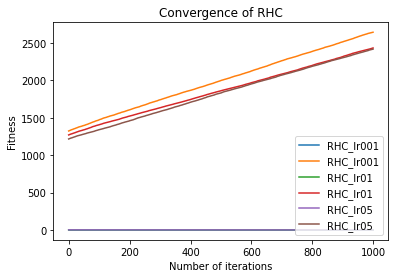

In [27]:
plt.plot(rhc_nn_model1.fitness_curve,label='RHC_lr001')
plt.plot(rhc_nn_model2.fitness_curve,label='RHC_lr01')
plt.plot(rhc_nn_model3.fitness_curve,label='RHC_lr05')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.title('Convergence of RHC')
plt.legend(loc='lower right')
plt.show()

In [13]:
# Initialize neural network object and fit object
gd_start = time.time()
gd_nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)

gd_nn_model1.fit(X_train_scaled, y_train_hot)
print('gd1_loss:', gd_nn_model1.loss)

gd_train_time = time.time() - gd_start
print('gd1_train_time:', gd_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
gd_y_train_pred = gd_nn_model1.predict(X_train_scaled)
gd_y_train_roc = roc_auc_score(y_train_hot, gd_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('gd1_y_train_roc', gd_y_train_roc)


gd1_loss: 0.3126996367447168
gd1_train_time: 1.2762999534606934
gd1_y_train_roc 0.7938144329896908


In [14]:
# Initialize neural network object and fit object
gd_start = time.time()
gd_nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)

gd_nn_model2.fit(X_train_scaled, y_train_hot)
print('gd2_loss:', gd_nn_model2.loss)

gd_train_time = time.time() - gd_start
print('gd2_train_time:', gd_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
gd_y_train_pred = gd_nn_model2.predict(X_train_scaled)
gd_y_train_roc = roc_auc_score(y_train_hot, gd_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('gd2_y_train_roc', gd_y_train_roc)


gd2_loss: 1.0749797713381075
gd2_train_time: 0.12680292129516602
gd2_y_train_roc 0.6391752577319587


In [15]:
# Initialize neural network object and fit object
gd_start = time.time()
gd_nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)

gd_nn_model3.fit(X_train_scaled, y_train_hot)
print('gd3_loss:', gd_nn_model3.loss)

gd_train_time = time.time() - gd_start
print('gd3_train_time:', gd_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
gd_y_train_pred = gd_nn_model3.predict(X_train_scaled)
gd_y_train_roc = roc_auc_score(y_train_hot, gd_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('gd3_y_train_roc', gd_y_train_roc)


gd3_loss: 1.0986122886681098
gd3_train_time: 0.13666915893554688
gd3_y_train_roc 0.5


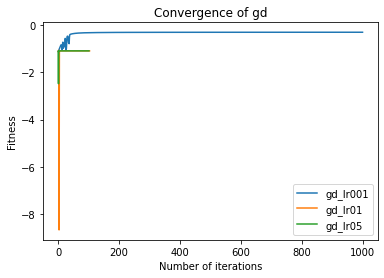

In [17]:
plt.plot(gd_nn_model1.fitness_curve,label='gd_lr001')
plt.plot(gd_nn_model2.fitness_curve,label='gd_lr01')
plt.plot(gd_nn_model3.fitness_curve,label='gd_lr05')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.title('Convergence of gd')
plt.legend(loc='lower right')
plt.show()

Simulated Annealing algorithm to find the optimal weights

In [32]:
# Initialize neural network object and fit object
sa_start = time.time()
sa_nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 schedule = mlrose.GeomDecay(), random_state = 3, curve = True)

sa_nn_model1.fit(X_train_scaled, y_train_hot)
print('sa1_loss:', sa_nn_model1.loss)

sa_train_time = time.time() - sa_start
print('sa1_train_time:', sa_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
sa_y_train_pred = sa_nn_model1.predict(X_train_scaled)
sa_y_train_roc = roc_auc_score(y_train_hot, sa_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('sa1_y_train_roc', sa_y_train_roc)

sa1_loss: 1.111687891984259
sa1_train_time: 1.2603096961975098
sa1_y_train_roc 0.31882208839440646


In [33]:
# Initialize neural network object and fit object
sa_start = time.time()
sa_nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 schedule = mlrose.GeomDecay(), random_state = 3, curve = True)

sa_nn_model2.fit(X_train_scaled, y_train_hot)
print('sa2_loss:', sa_nn_model2.loss)

sa_train_time = time.time() - sa_start
print('sa2_train_time:', sa_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
sa_y_train_pred = sa_nn_model2.predict(X_train_scaled)
sa_y_train_roc = roc_auc_score(y_train_hot, sa_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('sa2_y_train_roc', sa_y_train_roc)

sa2_loss: 1.0296604721223044
sa2_train_time: 1.242149829864502
sa2_y_train_roc 0.5023932253313697


In [34]:
# Initialize neural network object and fit object
sa_start = time.time()
sa_nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 schedule = mlrose.GeomDecay(), random_state = 3, curve = True)

sa_nn_model3.fit(X_train_scaled, y_train_hot)
print('sa3_loss:', sa_nn_model3.loss)

sa_train_time = time.time() - sa_start
print('sa3_train_time:', sa_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
sa_y_train_pred = sa_nn_model3.predict(X_train_scaled)
sa_y_train_roc = roc_auc_score(y_train_hot, sa_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('sa3_y_train_roc', sa_y_train_roc)

sa3_loss: 0.03548273238548961
sa3_train_time: 1.0749256610870361
sa3_y_train_roc 1.0


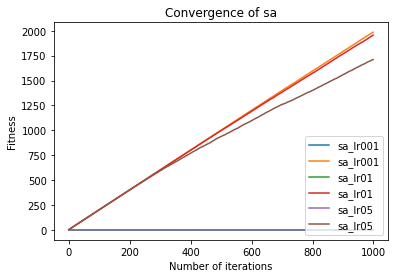

In [39]:
plt.plot(sa_nn_model1.fitness_curve,label='sa_lr001')
plt.plot(sa_nn_model2.fitness_curve,label='sa_lr01')
plt.plot(sa_nn_model3.fitness_curve,label='sa_lr05')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.title('Convergence of sa')
plt.legend(loc='lower right')
plt.show()

Genetic Algorithm to find the optimal weights

In [40]:
# Initialize neural network object and fit object

ga_start = time.time()
ga_nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)

ga_nn_model1.fit(X_train_scaled, y_train_hot)
print('ga1_loss:', ga_nn_model1.loss)

ga_train_time = time.time() - ga_start
print('ga1_train_time:', ga_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
ga_y_train_pred = ga_nn_model1.predict(X_train_scaled)
ga_y_train_roc = roc_auc_score(y_train_hot, ga_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('ga1_y_train_roc', ga_y_train_roc)



ga1_loss: 0.03563205287926369
ga1_train_time: 58.99436116218567
ga1_y_train_roc 0.9888929798723614


In [41]:
# Initialize neural network object and fit object
ga_start = time.time()
ga_nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)

ga_nn_model2.fit(X_train_scaled, y_train_hot)
print('ga2_loss:', ga_nn_model2.loss)

ga_train_time = time.time() - ga_start
print('ga2_train_time:', ga_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
ga_y_train_pred = ga_nn_model2.predict(X_train_scaled)
ga_y_train_roc = roc_auc_score(y_train_hot, ga_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('ga2_y_train_roc', ga_y_train_roc)


ga2_loss: 0.03563205287926369
ga2_train_time: 58.456664085388184
ga2_y_train_roc 0.9888929798723614


In [42]:
# Initialize neural network object and fit object
ga_start = time.time()
ga_nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [6], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)

ga_nn_model3.fit(X_train_scaled, y_train_hot)
print('ga3_loss:', ga_nn_model3.loss)

ga_train_time = time.time() - ga_start
print('ga3_train_time:', ga_train_time)

# Predict labels for train set and assess accuracy

start = time.time()
ga_y_train_pred = ga_nn_model3.predict(X_train_scaled)
ga_y_train_roc = roc_auc_score(y_train_hot, ga_y_train_pred, multi_class="ovr", average="weighted")
#rhc_y_train_query_time = time.time() - start
print('ga3_y_train_roc', ga_y_train_roc)


ga3_loss: 0.03563205287926369
ga3_train_time: 58.61202096939087
ga3_y_train_roc 0.9888929798723614


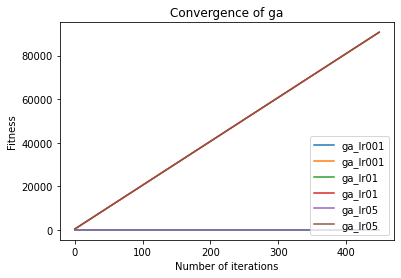

In [43]:
plt.plot(ga_nn_model1.fitness_curve,label='ga_lr001')
plt.plot(ga_nn_model2.fitness_curve,label='ga_lr01')
plt.plot(ga_nn_model3.fitness_curve,label='ga_lr05')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.title('Convergence of ga')
plt.legend(loc='lower right')
plt.show()

In [ ]:
MIMIC can not be applied on continous-state optimization problems

# PART III Apply four randomized optimization algorithms in selected problems

# A. Travelling Saleman Problem

In [36]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

In [37]:
# Create list of distances between pairs of cities
dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), \
             (0, 5, 5.3852), (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), \
             (1, 3, 2.8284), (1, 4, 2.0000), (1, 5, 4.1231), (1, 6, 4.2426), \
             (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361), (2, 5, 4.4721), \
             (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056), \
             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), \
             (4, 7, 2.2361), (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

# Initialize fitness function object using dist_list
fitness_dists = mlrose.TravellingSales(distances = dist_list)

In [38]:
# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize=False)

In [39]:
# Create list of city coordinates
#coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Define optimization problem object
#problem_no_fit = mlrose.TSPOpt(length = 8, coords = coords_list, maximize=False)

In [40]:

# Solve problem using random hill climnb
start = time.time()
best_state, best_fitness, fitness_curve1 = mlrose.random_hill_climb(problem_fit, 
                                                      max_attempts=400, max_iters=4000,
                                                      random_state=1, curve=True)
end = time.time()
rhc_time = end - start




print(rhc_time)

0.024919986724853516


In [41]:
# Solve problem using simulated annealing
start = time.time()
best_state, best_fitness, fitness_curve2 = mlrose.simulated_annealing(problem_fit, schedule=schedule,
                                                      max_attempts=400, max_iters=4000,
                                                       random_state=1, curve=True)
end = time.time()
sa_time = end - start

print(sa_time)

0.041887521743774414


In [42]:
# Solve problem using mimic
start = time.time()
best_state, best_fitness, fitness_curve3 = mlrose.mimic(problem, pop_size=200, keep_pct=0.1, 
                                                      max_attempts=100, max_iters=1000,
                                                      random_state=1, curve=True)
end = time.time()
mimic_time = end - start

print(mimic_time)

3.1562561988830566


In [43]:
# Solve problem using genetic algorithm
start = time.time()
best_state, best_fitness, fitness_curve4 = mlrose.genetic_alg(problem_fit, pop_size=200, mutation_prob=1,
                                                      max_attempts=20, max_iters=1000,
                                                      random_state=1, curve=True)
end = time.time()
ga_time = end - start
print(ga_time)

0.32960033416748047


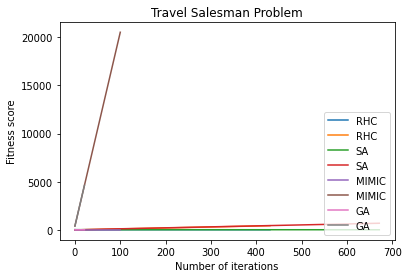

In [44]:
plt.plot(fitness_curve1, label='RHC')
plt.plot(fitness_curve2, label='SA')
plt.plot(fitness_curve3, label='MIMIC')
plt.plot(fitness_curve4, label='GA')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness score')
plt.title('Travel Salesman Problem')
plt.legend(loc='lower right')
plt.show()


# B. Flip-flop Problem

In [45]:
fitness = mlrose.FlipFlop()
problem = mlrose.DiscreteOpt(
    length=10, fitness_fn=fitness, maximize=True, max_val=2)

# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
# n=10
init_state = np.array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [46]:

# Solve problem using random hill climnb
start = time.time()
best_state, best_fitness, fitness_curve_1 = mlrose.random_hill_climb(problem, 
                                                      max_attempts=400, max_iters=4000,
                                                      init_state=init_state, random_state=1, curve=True)
end = time.time()
rhc_time = end - start




print(rhc_time)

0.0109710693359375


In [47]:
# Solve problem using simulated annealing
start = time.time()
best_state, best_fitness, fitness_curve_2 = mlrose.simulated_annealing(problem, schedule=schedule,
                                                      max_attempts=400, max_iters=4000,
                                                      init_state=init_state, random_state=1, curve=True)
end = time.time()
sa_time = end - start

print(sa_time)

0.02293848991394043


In [48]:
# Solve problem using genetic algorithm
start = time.time()
best_state, best_fitness, fitness_curve_3 = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0,
                                                      max_attempts=20, max_iters=1000,
                                                      random_state=1, curve=True)
end = time.time()
ga_time = end - start
print(ga_time)

0.2549316883087158


In [49]:
# Solve problem using mimic
start = time.time()
best_state, best_fitness, fitness_curve_4 = mlrose.mimic(problem, pop_size=200, keep_pct=0.1, 
                                                      max_attempts=100, max_iters=1000,
                                                      random_state=1, curve=True)
end = time.time()
mimic_time = end - start

print(mimic_time)

3.1636106967926025


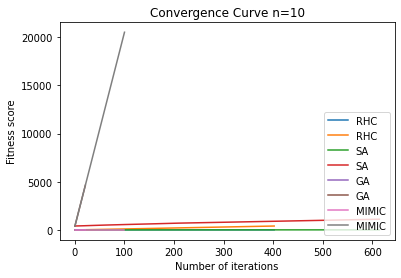

In [50]:
plt.plot(fitness_curve_1, label='RHC')
plt.plot(fitness_curve_2, label='SA')
plt.plot(fitness_curve_3, label='GA')
plt.plot(fitness_curve_4, label='MIMIC')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness score')
plt.title('Convergence Curve n=10')
plt.legend(loc='lower right')
plt.show()
